### import everything

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_moons

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

### 製作2維資料

In [7]:
data, label = make_moons(n_samples=500, noise=0.2, random_state=0)
#label = label.reshape(500, 1)

In [8]:
print('data shape :', data.shape)
print(data[:5], '\n')
print('label shape:', label.shape)
print(label[:5])

('data shape :', (500, 2))
(array([[ 0.30240233,  0.89623817],
       [-0.38598275,  0.48730979],
       [ 0.19020931,  0.11325428],
       [ 1.71457157, -0.11033049],
       [ 1.96706272, -0.5158008 ]]), '\n')
('label shape:', (500,))
[0 1 1 1 1]


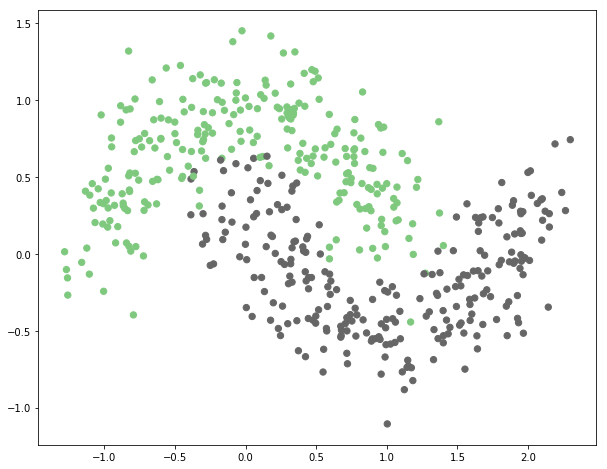

In [9]:
# draw picture
plt.scatter(data[:,0], data[:,1], s=40, c=label, cmap=plt.cm.Accent)

### 使用Keras撰寫logistic regression

In [5]:
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(2,)))
model.compile(optimizer='sgd', loss='binary_crossentropy')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3.0
Trainable params: 3
Non-trainable params: 0.0
_________________________________________________________________


### 疊代一次

In [6]:
model.fit(data, label, epochs=1, verbose=0)

In [7]:
result = model.predict(data)
result[result >= 0.5] = 1
result[result < 0.5] = 0
result[:20]

array([[ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]], dtype=float32)

In [8]:
print('Accuary:', float(sum(label == result)[0])  / label.shape[0])

Accuary: 0.622


### 畫出預測邊界

In [9]:
def plot_decision_boundary(X, y, model):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    pred_every_point = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(pred_every_point)
    Z[Z>=0.5] = 1
    Z[Z<0.5] = 0
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], s=40,  c=y, cmap=plt.cm.BuGn)

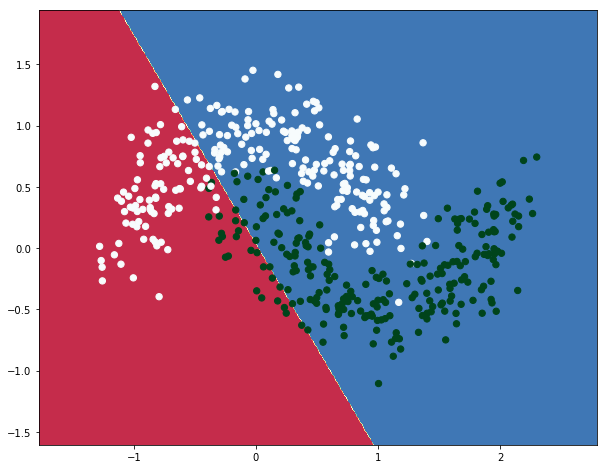

In [10]:
plot_decision_boundary(data, label, model)

### 更新權重1000次

In [11]:
%%time
model.fit(data, label, epochs=1000, verbose=0)

CPU times: user 23.9 s, sys: 4.86 s, total: 28.8 s
Wall time: 15.8 s


In [12]:
result = model.predict(data)
result[result >= 0.5] = 1
result[result < 0.5] = 0

print('Accuary:', float(sum(label == result)[0])  / label.shape[0])

Accuary: 0.866


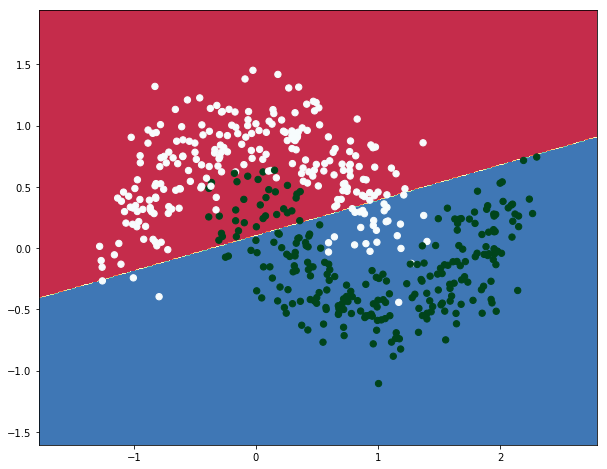

In [13]:
plot_decision_boundary(data, label, model)

# Your turn!

* 調整Learning Rate，對收斂速度有何影響?
* 多訓練幾次會增進Accuary嗎?

In [ ]:
from keras.optimizers import SGD

learning_rate = # 填入想實驗的learning rate


model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(2,)))
sgd = SGD(lr=learning_rate)
model.compile(optimizer=sgd, loss='binary_crossentropy')
model.summary()

In [ ]:
%%time

epochs = # 填入想實驗的步數

model.fit(data, label, epochs=epochs, verbose=0)

In [ ]:
# 觀看你的參數對實驗結果的影響

result = model.predict(data)
result[result >= 0.5] = 1
result[result < 0.5] = 0

print('Accuary:', float(sum(label == result)[0])  / label.shape[0])